In [2]:
import numpy as np
import datetime
import cf_units
import xarray as xr
import os
import sys
import datetime as dt
import matplotlib as mpl
import copy

## plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import numpy.ma as ma
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import mplotutils as mpu
import seaborn as sns

#loading data
from sklearn.externals import joblib


/home/tristan/miniconda3/envs/mesmer-env/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
def cos_wgt(ds, lat_string):
    
    from numpy import cos, deg2rad
    if lat_string == 'latitude':
        weights = np.cos(np.deg2rad(ds.latitude))
        
    else:
        weights = np.cos(np.deg2rad(ds.lat))
    
    return weights

In [4]:
### set plot params

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
          'figure.figsize': (9,5),
          "font.family": "serif",
         'ytick.labelsize':'x-large',
         "font.weight":"normal",
         "axes.labelweight":"normal"}
plt.rcParams.update(params)

# original one degree data

In [5]:
## plot the observed land surface trend from BEST ORIGINAL dataset

#Get directory
dir_in_data_mod = '/home/tristan/mesmer/data/'
    
#prepare the inputs as array
BEST_data = 'full_earth.nc'

# load in observation data
df_obs = xr.open_mfdataset(dir_in_data_mod+BEST_data)
df_obs

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2064, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.022e+03 2.022e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    temperature  (time, latitude, longitude) float32 dask.array<chunksize=(2064, 180, 360), meta=np.ndarray>
    climatology  (month_number, latitude, longitude) float32 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:  Berkeley Earth Internal Convention (based on CF-1.5)
    title:        Native Format Berkeley Earth Surface Temperature Anomaly Field
    institution:  Berkeley Earth Surface Temperature Project
    comment:      This file contains surface temperature anomaly field gridde...

In [9]:
wgt = cos_wgt(df_obs, 'latitude')


df_weighted = df_obs.weighted(wgt)
df_weighted_mean = df_weighted.mean(("latitude", "longitude"))
df_weighted_mean


<xarray.Dataset>
Dimensions:      (time: 2064, month_number: 12)
Coordinates:
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.022e+03 2.022e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    float64 dask.array<chunksize=(), meta=np.ndarray>
    temperature  (time) float32 dask.array<chunksize=(2064,), meta=np.ndarray>
    climatology  (month_number) float32 dask.array<chunksize=(12,), meta=np.ndarray>

In [10]:
df_obs_np = np.array(df_weighted_mean['temperature'])

print(df_obs_np.shape)

df_obs_smooth = df_weighted_mean.rolling(time=12*5, center=True).mean()
df_obs_smooth = np.array(df_obs_smooth['temperature'])

print(df_obs_smooth.shape)

(2064,)
(2064,)


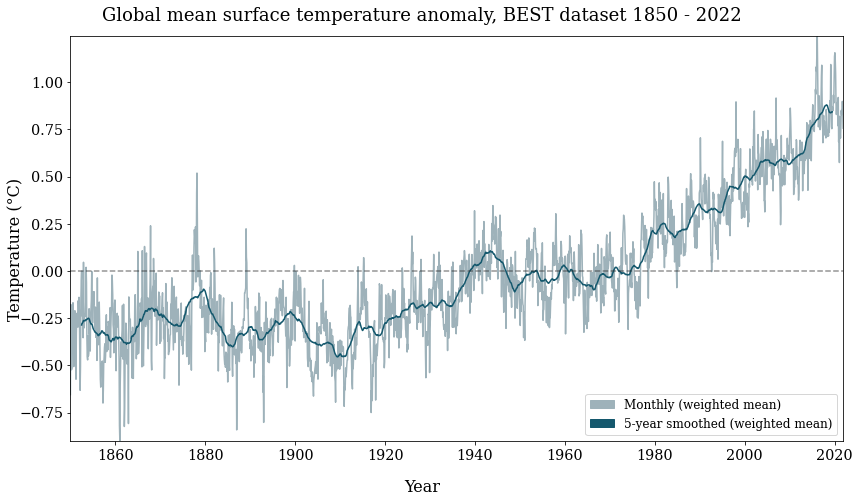

In [11]:
time = np.arange(np.datetime64('1850-01-15'), np.datetime64('2022-01-15'), dtype='datetime64[M]')
time2 = np.arange(np.datetime64('1850'), np.datetime64('2022'), dtype='datetime64[Y]')

fig, ax = plt.subplots(figsize=(12,7))
fig.suptitle("Global mean surface temperature anomaly, BEST dataset 1850 - 2022", fontsize=18)
fig.supylabel("Temperature (°C)", fontsize=16)
fig.supxlabel("Year", fontsize=16)

#create legend
monthly_vals = mpatches.Patch(color="#9EB2BA", label="Monthly (weighted mean)")
obs_yr_vals = mpatches.Patch(color="#14586D", label="5-year smoothed (weighted mean)")


ax.plot(time,
       df_obs_np,
        color="#9EB2BA")
ax.plot(time,
       df_obs_smooth,
        color="#14586D")

plt.axhline(y=0, color='#2a2a2a', linestyle='--', alpha=0.5)

ax.legend(handles=[monthly_vals, obs_yr_vals], loc="lower right", prop={'size': 12})


plt.tight_layout()
plt.margins(x=0, y=0)
plt.show()